# Random Forest and Gradient Boosting

## Random Forest Classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

dataset = pd.read_csv('datasets/Social_Network_Ads.csv')

In [2]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X = dataset.iloc[:, [2,3]]
y = dataset.iloc[:, 4]

In [4]:
# dataset 을 Training 과 Test set 으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [5]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [6]:
# 랜덤 포레스트 분류기(RandomForestClassifier) 객체 생성
# - n_estimators=10: 트리의 개수를 10개로 설정
# - criterion='entropy': 정보 이득(Entropy)을 기준으로 분할
# - random_state=0: 결과 재현성을 위한 랜덤 시드 고정
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)

# 학습 데이터(X_train, y_train)를 사용하여 모델 학습
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [18]:
# 테스트 데이터에 대해 랜덤 포레스트 모델로 예측 수행
y_pred = rf.predict(X_test)

# 예측 결과 출력
print(y_pred)
print()

# 실제 테스트 세트에서 True (또는 1)인 값의 개수 출력
print("테스트 세트에서 실제 True 개수 = ", sum(y_test))

# 예측된 결과 중 True (또는 1)인 값의 개수 출력
print("예측된 True 개수 = ", sum(y_pred))

# 예측 정확도 계산 및 출력 (예측이 맞은 비율)
print("정확도 = {:.2f}".format(sum(y_pred == y_test) / len(y_test)))

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 1 1]

테스트 세트에서 실제 True 개수 =  22
예측된 True 개수 =  23
정확도 = 0.91


In [19]:
# 혼동 행렬(Confusion Matrix) 출력
# - labels=[1, 0]: 1을 positive 클래스, 0을 negative 클래스로 지정
print("confusion matrix\n", 
      confusion_matrix(y_test, y_pred, labels=[1, 0]))

print()

# F1 스코어 출력
# - 정밀도(precision)와 재현율(recall)의 조화 평균
# - 불균형 클래스 문제에서 유용한 평가 지표
print("f1 score\n", f1_score(y_test, y_pred, labels=[1, 0]))

confusion matrix
 [[19  3]
 [ 4 54]]

f1 score
 0.8444444444444444


## Gradient Boosting Classifier

- min_samples_split : node 분리에 필요한 최소 sample 수 => overfitting 방지  
- max_depth : tree 깊이 조절 => overfitting 방지
- learning_rate : 각 tree 의 기여도 조정, n_estimators 와 trade-off 
- n_estimators : number of sequential trees

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

# 그래디언트 부스팅 분류기(Gradient Boosting Classifier) 생성
# - learning_rate=0.1: 학습률 설정 (각 단계에서 기여하는 정도)
# - n_estimators=500: 트리의 개수를 500개로 설정
# - max_depth=5: 각 결정 트리의 최대 깊이를 5로 설정
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=500, max_depth=5)

# 학습 데이터(X_train, y_train)를 사용하여 모델 학습
gb.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=500)

In [21]:
# 테스트 데이터(X_test)에 대해 그래디언트 부스팅 모델로 예측 수행
y_pred = gb.predict(X_test)

# 예측 결과 출력
print(y_pred)
print()

# 테스트 세트에서 실제로 True(또는 1)인 샘플의 개수 출력
print("테스트 세트에서 실제 True 개수 = ", sum(y_test))

# 예측 결과 중 True(또는 1)로 예측된 개수 출력
print("예측된 True 개수 = ", sum(y_pred))

# 예측 정확도 출력
# - 예측이 실제 정답과 일치한 비율
print("정확도 = {:.2f}".format(sum(y_pred == y_test) / len(y_test)))

[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 1 1]

테스트 세트에서 실제 True 개수 =  22
예측된 True 개수 =  22
정확도 = 0.93


In [22]:
# 혼동 행렬(Confusion Matrix) 출력
# - 실제 값(y_test)과 예측 값(y_pred)을 비교하여 분류 성능 평가
# - labels=[1, 0]: 1을 positive 클래스, 0을 negative 클래스로 설정
print("confusion matrix\n", confusion_matrix(y_test, y_pred, labels=[1, 0]))
print()

# F1 점수(F1 score) 출력
# - 정밀도(precision)와 재현율(recall)의 조화 평균
# - 불균형 데이터셋에서 효과적인 성능 평가 지표
print("f1 score\n", f1_score(y_test, y_pred, labels=[1, 0]))

confusion matrix
 [[19  3]
 [ 3 55]]

f1 score
 0.8636363636363636


## 훈련 결과 시각화

In [23]:
from matplotlib.colors import ListedColormap

# 색상 맵 생성
# - cmap_light: 배경색 (결정 경계 시각화를 위한 연한 색상)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])   

# - cmap_bold: 데이터 포인트 표시용 진한 색상
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])  

In [24]:
# X_test의 첫 번째 특성(x1)의 최소값과 최대값 범위 설정 (시각화 영역 확보를 위해 -1, +1 여유 추가)
x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1       

# X_test의 두 번째 특성(x2)의 최소값과 최대값 범위 설정
x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1  

# x1, x2 축을 따라 0.1 간격으로 그리드 포인트 생성
X1, X2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), 
                     np.arange(x2_min, x2_max, 0.1))

# 생성된 그리드 포인트를 2차원 배열로 결합 (모델 입력 형태로 변환)
XX = np.column_stack([X1.ravel(), X2.ravel()])

# 랜덤 포레스트 모델로 각 그리드 포인트에 대한 예측 수행
Y_rf = np.array(rf.predict(XX))

# 그래디언트 부스팅 모델로 각 그리드 포인트에 대한 예측 수행
Y_gb = np.array(gb.predict(XX))

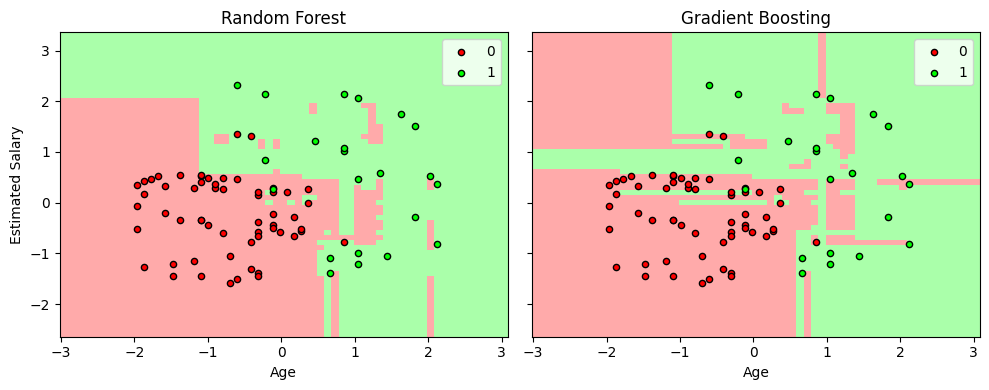

In [26]:
# 두 개의 서브플롯 생성 (1행 2열) - 랜덤 포레스트 vs 그래디언트 부스팅 비교
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# [좌측] 랜덤 포레스트 시각화
# - 예측 결과(Y_rf)를 배경색으로 표현
ax1.pcolormesh(X1, X2, Y_rf.reshape(X1.shape), 
               cmap=cmap_light, shading='auto') 

# - 실제 테스트 데이터를 클래스별로 색상 표시
for i in range(2):
    ax1.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], s=20, 
                color=cmap_bold(i), label=i, edgecolor='k')

# - 제목 및 축 라벨 설정
ax1.set_title('Random Forest')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')
ax1.legend()

# [우측] 그래디언트 부스팅 시각화
# - 예측 결과(Y_gb)를 배경색으로 표현
ax2.pcolormesh(X1, X2, Y_gb.reshape(X1.shape), 
               cmap=cmap_light, shading='auto') 

# - 실제 테스트 데이터를 클래스별로 색상 표시
for i in range(2):
    ax2.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], s=20, 
                color=cmap_bold(i), label=i, edgecolor='k')

# - 제목 및 축 라벨 설정
ax2.set_title('Gradient Boosting')
ax2.set_xlabel('Age')
ax2.legend()

# 레이아웃 정리
plt.tight_layout()

In [27]:
gb.feature_importances_       # Age, EstimatedSalary 의 중요도

array([0.49419352, 0.50580648])

In [28]:
# 그래디언트 부스팅 모델에서 계산된 특성 중요도 추출
# - gb.feature_importances_: 각 특성이 예측에 기여한 정도를 나타내는 값
# - ['Age', 'EstimatedSalary']: 특성 이름을 지정

feature_imp = pd.Series(gb.feature_importances_, 
            ['Age', 'EstimatedSalary']).sort_values(ascending=False)
feature_imp

EstimatedSalary    0.505806
Age                0.494194
dtype: float64

<Axes: title={'center': 'feature importance'}>

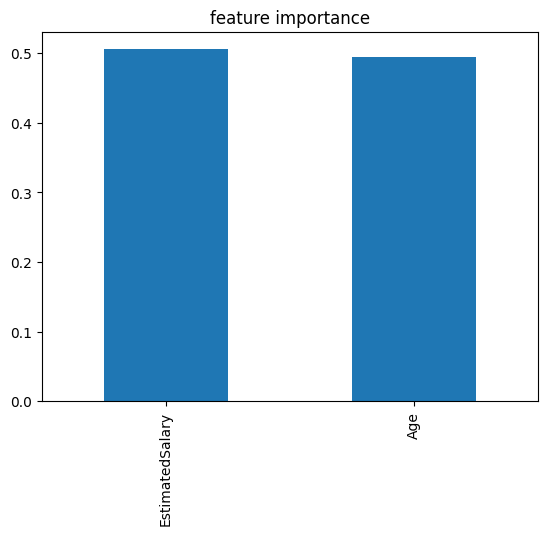

In [29]:
# 특성 중요도(feature importance)를 막대그래프로 시각화
# - kind='bar': 막대 그래프 형식
# - title='feature importance': 그래프 제목 설정
feature_imp.plot(kind='bar', title='feature importance')